1. $X_1, \ldots, X_n \sim R[\theta, \, \theta+1]$. Гипотеза $H_0 \colon \theta = 0$, альтернатива $H_1 \colon \theta = \theta_1$. Рассмотрим критические множества вида $\{X_{(1)} > C\},~ \{X_{(1)} < C\},~ \{X_{(n)} > C\}$.

1.1 Построить графики зависимости ошибки первого рода и второго рода $\alpha_i (C)$ (для $\theta_1 = 1$ и $\theta_1 = -1$). Можно ли минимизировать одновременно обе ошибки?

Ошибка первого рода - опровержение верной гипотезы. Ошибка второго рода - принятие ложной гипотезы. Таким образом, ошибка первого рода в нашем случае устроена как $X_1, \ldots, X_n \sim R[0, \, 1]$, $\{X_{(1)} > C\},~ \{X_{(1)} < C\},~ \{X_{(n)} > C\}$. $P(X_{(1)} > C) = P(X_1 > C, \ldots, X_n > C) = (P(X_{i} > C))^n = (1 - F_X(C))^n$. Аналогично получаем для остальных: $P(X_{(1)} < C) = 1 - (1 - F_X(C))^n$, $P(X_{(n)} > C) = 1 - (F_X(C))^n$. 


Ошибка второго рода устроена как $X_1, \ldots, X_n \sim R[\theta_1, \, \theta_1+1]$, $\{X_{(1)} < C\},~ \{X_{(1)} > C\},~ \{X_{(n)} < C\}$. Аналогично ошибке первого рода получаем: $P(X_{(1)} < C) = 1 - (1 - F_X(C))^n$, $P(X_{(1)} > C) = (1 - F_X(C))^n$, $P(X_{(n)} < C) = (F_X(C))^n$

Построим графики зависимости вероятности ошибки от константы $C$:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

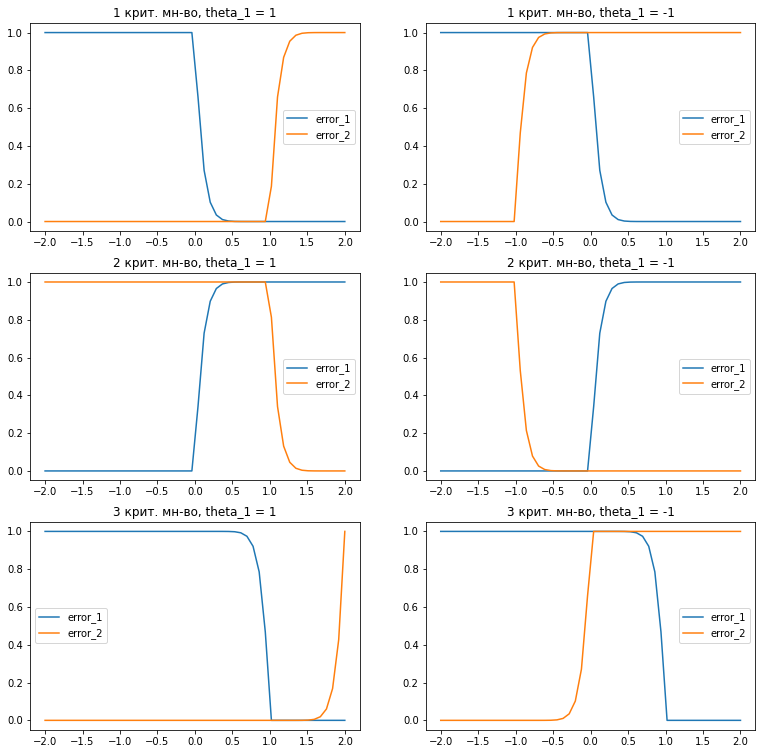

In [2]:
theta_1 = 1
theta_2 = -1
n = 10
c = np.linspace(-2, 2, 50)
f = 0

def func(x):
    if (x < 0): 
        f = 0
    elif (x >= 1):
        f = 1
    else:
        f = x
    return f;
    

error_1 = []
error_2 = []
error_22 = []

error_3 = []
error_4 = []
error_44 = []

error_5 = []
error_6 = []
error_66 = []

for cc in c:
    f = func(cc);
    error_1.append((1-f)**n)
    error_3.append((1-(1-f)**n))
    error_5.append(1 - f**n)
    
    
    f = func(cc - theta_1)
    error_2.append((1-(1-f)**n))
    error_4.append((1-f)**n)
    error_6.append(f**n)
    
    f = func(cc - theta_2)
    error_22.append((1-(1-f)**n))
    error_44.append((1-f)**n)
    error_66.append(f**n) 
    
    
plt.figure(figsize=(13, 13))
plt.subplot(3, 2, 1)
plt.plot(c, error_1, label ='error_1')
plt.plot(c, error_2, label ='error_2')
plt.title('1 крит. мн-во, theta_1 = 1')
plt.legend()

plt.subplot(3, 2, 2)
plt.plot(c, error_1, label ='error_1')
plt.plot(c, error_22, label ='error_2')
plt.title('1 крит. мн-во, theta_1 = -1')
plt.legend()

plt.subplot(3, 2, 3)
plt.plot(c, error_3, label ='error_1')
plt.plot(c, error_4, label ='error_2')
plt.title('2 крит. мн-во, theta_1 = 1')
plt.legend()

plt.subplot(3, 2, 4)
plt.plot(c, error_3, label ='error_1')
plt.plot(c, error_44, label ='error_2')
plt.title('2 крит. мн-во, theta_1 = -1')
plt.legend()

plt.subplot(3, 2, 5)
plt.plot(c, error_5, label ='error_1')
plt.plot(c, error_6, label ='error_2')
plt.title('3 крит. мн-во, theta_1 = 1')
plt.legend()

plt.subplot(3, 2, 6)
plt.plot(c, error_5, label ='error_1')
plt.plot(c, error_66, label ='error_2')
plt.title('3 крит. мн-во, theta_1 = -1')
plt.legend()
plt.show()

1.2 Для каждого множества найти C такое, что $\alpha_1(C) = 0.05$ и зафиксировать его. Построить теперь графики
мощности $\beta(\theta_1), ~\theta_1 \in [-5, \, 5]$, для разных $n$. Найдется ли такое $n$, что $\inf{\beta(\theta_1)} > 0.95$?

Найдем константу С для каждого из критических множеств:

Для первого множества: $C = 1 - a^{\tfrac{1}{n}}$

Для второго множества: $C = 1 - (1 - a)^{\tfrac{1}{n}}$

Для третьего множества: $C = (1 - a)^{\tfrac{1}{n}}$

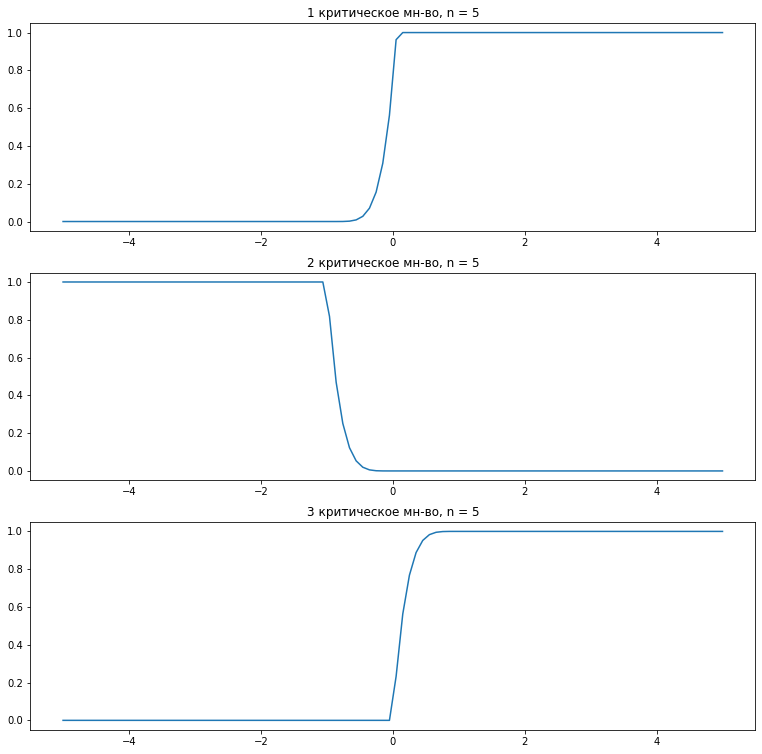

In [5]:
a = 0.05

c_1 = 1 - a**(1/n)
c_2 = 1 - (1 - a)**(1/n)
c_3 = (1 - a)**(1/n)

theta_1 = np.linspace(-5, 5, 100)
n = 5

power_1 = []
power_2 = []
power_3 = []
f = 0

for t in theta_1:
    f= func(c_1 - t )
    power_1.append((1-f)**n)
                       
    f = func(c_2 - t)
    power_2.append(1-(1-f**n))
    
    f = func(c_3 - t)
    power_3.append(1-f**n)

plt.figure(figsize=(13, 13))
plt.subplot(3, 1, 1)
plt.plot(theta_1, power_1)
plt.title('1 критическое мн-во, n = %d' % n)

plt.subplot(3, 1, 2)
plt.plot(theta_1, power_2)
plt.title('2 критическое мн-во, n = %d' % n)

plt.subplot(3, 1, 3)
plt.plot(theta_1, power_3)
plt.title('3 критическое мн-во, n = %d' % n)
plt.show()

1.3 Нарисовать графики p-value при нулевой гипотезе и альтернативе.

Мы знаем, что если $F(x)$ непрерывна, то $R \sim [0,\, 1]$. Значит, при гипотезе точки должны быть близки к
прямой $y = x$. При альтернативе мы ожидаем увидеть отклонение от этой прямой. В какую сторону отклоняется
график для альтернатив $H_1 \colon \theta = 1, ~H_2 \colon \theta = -1$?

Построить графики p-value для разных критериев на одном графике (для нулевой гипотезы и одной альтернативы). Для какого критического множества p-value при альтернативе сильнее отклоняется от $y = x$?

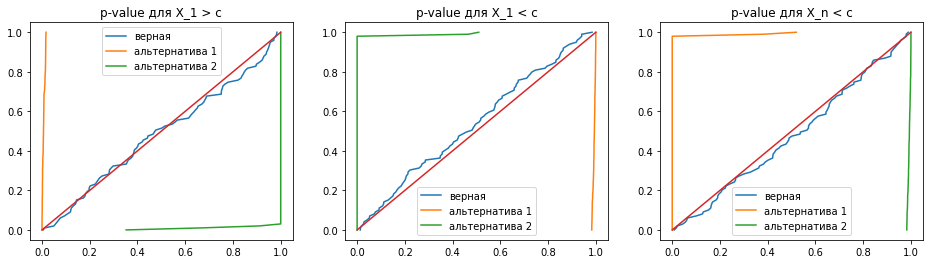

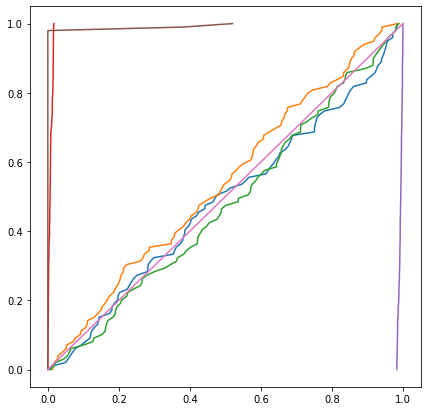

In [10]:
p_1 = []
p_2 = []
p_3 = []

theta_1 = 1/3
theta_2 = -1/3

n = 10
q = 100
space = np.linspace(0, 1, q)

for i in range(q):
    x_1 = np.random.uniform(0, 1, n)
    x_2 = np.random.uniform(theta_1, theta_1 + 1, n)
    x_3 = np.random.uniform(theta_2, theta_2 + 1, n)
    
    min_1 = min(x_1)
    min_2 = min(x_2)
    min_3 = min(x_3)
    
    p_1.append((1 - func(min_1))**n)
    p_2.append((1 - func(min_2))**n)
    p_3.append((1 - func(min_3))**n)

plt.figure(figsize=(16, 4))    

plt.subplot(1, 3, 1)
plt.plot(sorted(p_1), space, label = 'верная')
plt.plot(sorted(p_2), space, label = 'альтернатива 1')
plt.plot(sorted(p_3), space, label = 'альтернатива 2')
plt.plot(space, space)
plt.title('p-value для X_1 > c')
plt.legend()

p_4 = []
p_5 = []
p_6 = []

for i in range(q):
    x_1 = np.random.uniform(0, 1, n)
    x_2 = np.random.uniform(theta_1, theta_1 + 1, n)
    x_3 = np.random.uniform(theta_2, theta_2 + 1, n)
    
    min_1 = min(x_1)
    min_2 = min(x_2)
    min_3 = min(x_3)
    
    p_4.append(1-(1-func(min_1))**n)
    p_5.append(1-(1-func(min_2))**n)
    p_6.append(1-(1-func(min_3))**n)
    
plt.subplot(1, 3, 2)
plt.plot(sorted(p_4), space ,label = 'верная')
plt.plot(sorted(p_5), space,  label = 'альтернатива 1')
plt.plot(sorted(p_6), space,  label = 'альтернатива 2')
plt.plot(space, space)
plt.title('p-value для X_1 < c')
plt.legend()

p_7 = []
p_8 = []
p_9 = []

for i in range(q):
    x_1 = np.random.uniform(0, 1, n)
    x_2 = np.random.uniform(theta_1, theta_1 + 1, n)
    x_3 = np.random.uniform(theta_2, theta_2 + 1, n)
    
    max_1 = max(x_1)
    max_2 = max(x_2)
    max_3 = max(x_3)
    
    p_7.append(1-func(max_1)**n)
    p_8.append(1-func(max_2)**n)
    p_9.append(1-func(max_3)**n)

plt.subplot(1, 3, 3)
plt.plot(sorted(p_7), space,  label = 'верная')
plt.plot(sorted(p_8), space,  label = 'альтернатива 1')
plt.plot(sorted(p_9), space,  label = 'альтернатива 2')
plt.plot(space, space)
plt.title('p-value для X_n < c')
plt.legend()

plt.figure(figsize=(7, 7))
plt.plot(sorted(p_1), space, sorted(p_4), space, sorted(p_7), space)
plt.plot(sorted(p_2), space, sorted(p_5), space, sorted(p_8), space)
plt.plot(space, space)
plt.show()

1.4 $X_1, \ldots, X_n \sim Bern(\theta), ~H_0\colon \theta = 1/2, ~\theta = 1/3$. При каких $n$ можно построить критическое множество вида $\{\overline{X}<C\}$ так, чтобы ошибки первого и второго рода не превышали $0.05$? Пострить графики ошибок первого и второго рода (как функции от $C$) для разных n.

Найдем вероятности ошибок первого и второго рода. Для ошибки первого рода имеем: $\sum{X_i} \sim Bin(n, \theta), ~\theta = 1/2, ~\{\overline{X}<C\}$. $P(\overline{X} < C) = P(\sum{X_i} < n \cdot C)= I_{1 - \theta}(n - [n \cdot C], 1 + [n \cdot C])$, где $I$ - неполная бета-функция и округление целого берется в большую сторону.

Аналогично для ошибки второго рода получаем $\theta = 1/3, ~P(\overline{X} > C) = 1 - I_{1 - \theta}(n - [n \cdot C], 1 + [n \cdot C])$

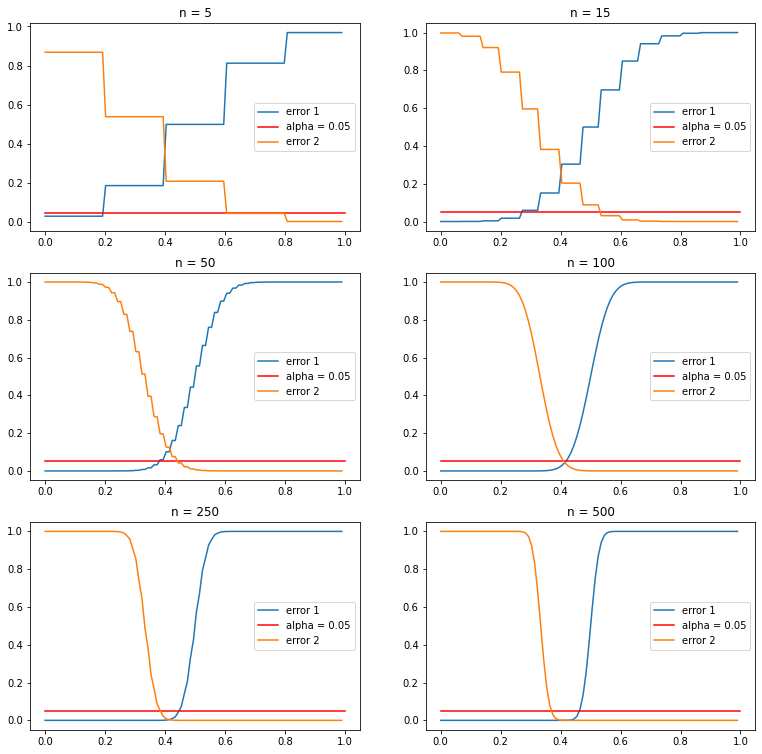

In [11]:
from scipy.special import betainc 
import math

theta_0 = 1/2
theta_1 = 1/3
n = [5, 15, 50, 100, 250, 500]
alpha = [0.05 for i in range(100)]
c = np.linspace(0, 1, 100)
plt.figure(figsize=(13, 13))
num = 0
for nn in n:
    error_1 = []
    error_2 = []
    for cc in c:
        error_1.append(betainc(nn - math.floor(nn*cc), 1 + math.floor(nn*cc), 1 - theta_0))
        error_2.append(1 - betainc(nn - math.floor(nn*cc), 1 + math.floor(nn*cc), 1 - theta_1))
    num += 1
    plt.subplot(3, 2, num)
    plt.plot(c, error_1, label = 'error 1')
    plt.plot(c, alpha, 'r', label = 'alpha = 0.05')
    plt.plot(c, error_2, label = 'error 2')
    plt.title('n = %d' % nn)
    plt.legend()
plt.show()